In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from pylab import rcParams
import io
%matplotlib inline
rcParams['figure.figsize'] = 11,7

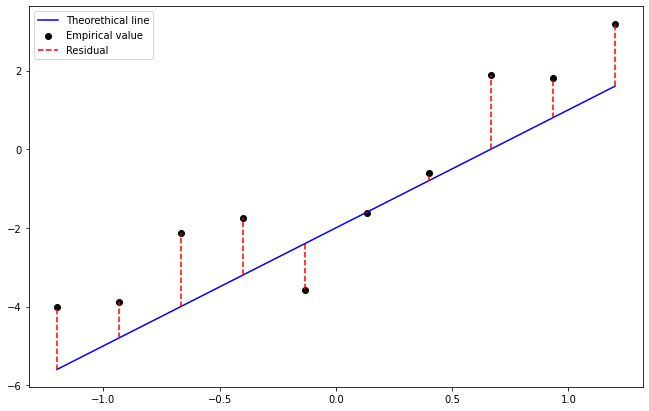

In [2]:
x = np.linspace(-1.2,1.2,10)
y = 3*x - 2
dy = 4*np.random.rand(10)-2
fig, ax = plt.subplots()
ax.plot(x,y, color = 'blue')
ax.scatter(x,y+dy,color='black')
ax.vlines(x,y,y+dy, colors='r', linestyles='--')
ax.legend( ['Theorethical line', 'Empirical value', 'Residual'])
# Комментарии к объектам на ваше усмотрение, Никита Вячеславович.
plt.show()

# Построим прямую, пользуясь методом наименьших квадратов

In [3]:
n = 20 # Определяем количестов точек, в которых производим измерения
a = -5 # Левая граница отрезка
b = 5 # Правая граница отрезка
x = np.linspace(a,b,n) # Разбиваем отрезок измерения на N 
y = np.random.randint(-10, 10, n) # Значения для игра выбереме случайным образом.
# В теории это зависимая величина, которая получается эмпирически

# Вычислим коэффициенты для подгоночной прямой

## $$\hat{\beta_1} = \frac{cov(x,y)}{Var(x)}$$
## $$\hat{\beta_0} = \bar{y} - \bar{x}\cdot{\hat{\beta_1}}$$

### np.sum(x*y) --- сумма произведений элементов массива.
### np.sum(x**2) --- сумма квадратов элементов массива
### np.sum(x)**2--- квадрат суммы элементов массива
### np.mean(x) --- среднее значение массива 

In [4]:
beta1 = (np.sum(x*y)/n - (np.sum(x)/n)*np.sum(y)/n)/(np.sum(x**2)/n - np.sum(x)**2/n)
beta1

0.5314285714285715

In [5]:
beta0 = np.mean(y) - np.mean(x)*beta1
beta0

-0.2999999999999999

# Вычислим массив предсказанных значений <span style="color:red"> y_pred </span>
# $$ \hat{y_i} = \hat{\beta_0} + \hat{\beta_1} x_i $$

In [6]:
pred_y = beta0 + beta1*x

# Строим график 

NameError: name 'lid_y' is not defined

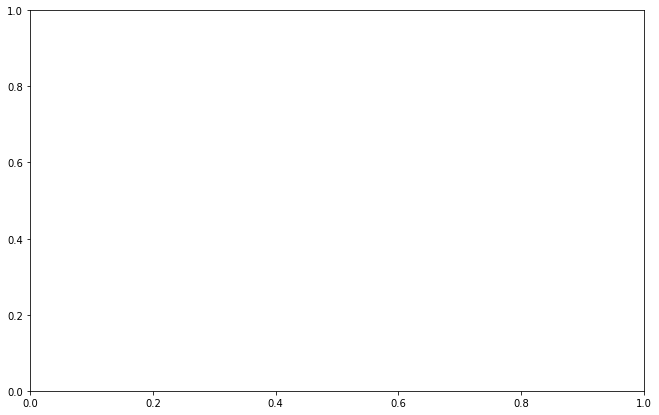

In [7]:
dy = y
fig, ax = plt.subplots()
ax.plot(x,lid_y, color = 'blue')
ax.scatter(x,pred_y+dy,color='black')
ax.vlines(x,lid_y,lid_y+dy, colors='r', linestyles='--')
ax.legend( ['Theorethical line', 'Empirical value', 'Residual'])
plt.show()

# Рассчитаем коэффициент детерминации регресии


## $$ R^2 = \frac{ESS}{TSS} = 1 - \frac{RSS}{TSS} $$
### $$ TSS = \sum\limits_{i=1}^{i=n}{(y_i - \bar{y})^2} $$
### $$ ESS = \sum\limits_{i=1}^{i=n}{(\hat{y_i} - \bar{y_i})^2} $$
### $$ RSS = \sum\limits_{i=1}^{i=n}{(y_i - \hat{y})^2} $$

In [ ]:
# полная сумма квадратов
TSS = np.sum(((y-np.mean(y))**2)) 
TSS

In [ ]:
# объяснённая сумма квадратов
ESS = np.sum(((pred_y - np.mean(y))**2)) 
ESS

In [ ]:
#остаточная сумма квадратов
RSS = np.sum((y-pred_y)**2)
RSS

In [ ]:
# коэффициент детерминации
R2det = ESS/TSS 
R2det

In [8]:
data_string = ''' sleep/60 totwrk age y.hat
51.88     3438  32  51.00
48.67     5020  31  44.43
44.50     2815  44  53.72
51.38     3786  30  49.53
57.47     2580  64  54.92
67.72     1205  41  60.36
53        2113  35  56.53
48.80     3608  47  50.46
56.13     2353  32  55.50
50.30     2851  30  53.41'''
df = pd.read_csv(io.StringIO(data_string), sep='\s+')
df.drop(columns='y.hat', inplace=True)
df.rename(columns={'sleep/60':'sleep'},inplace=True)

## Рассмотрим небольшой набор данных

In [9]:
df

,sleep,totwrk,age
0,51.88,3438,32
1,48.67,5020,31
2,44.50,2815,44
3,51.38,3786,30
4,57.47,2580,64
5,67.72,1205,41
6,53.00,2113,35
7,48.80,3608,47
8,56.13,2353,32
9,50.30,2851,30


In [10]:
# Выделим матрицу значений с независимыми переменными
X = df[['totwrk', 'age']]
X

,totwrk,age
0,3438,32
1,5020,31
2,2815,44
3,3786,30
4,2580,64
5,1205,41
6,2113,35
7,3608,47
8,2353,32
9,2851,30


In [11]:
# Столбец значений для зависимой переменной выглядит так:
Y = df[['sleep']]
Y

,sleep
0,51.88
1,48.67
2,44.50
3,51.38
4,57.47
5,67.72
6,53.00
7,48.80
8,56.13
9,50.30


In [12]:
# Чтобы получить транспонированную матрицу X, применим метод T
X.T

,0,1,2,3,4,5,6,7,8,9
totwrk,3438,5020,2815,3786,2580,1205,2113,3608,2353,2851
age,32,31,44,30,64,41,35,47,32,30


In [13]:
# Перемножим исходную матрицу с транспонированной с помощью операции '@'
X.T@X

,totwrk,age
totwrk,98533933,1121958
age,1121958,15956


In [14]:
# Обратную матрицу найдём с помощью методов библиотеки numpy
np.linalg.inv(X.T@X)

array([[ 5.09096996e-08, -3.57975337e-06],
       [-3.57975337e-06,  3.14385368e-04]])

## Теперь у нас есть всё, что нужно для вычисления вектора коэффициентов $\hat{\beta}$:
## $$\hat{\beta} = (X' X)^{-1}(X')Y$$

In [15]:
beta = np.linalg.inv(X.T @ X) @ X.T @ Y
beta

,sleep
0,0.004532
1,0.970893


In [16]:
# Тот же результат можно получить с помощью библиотеки smf
sleep = smf.ols(formula = "sleep~-1+totwrk + age", data = df).fit()
sleep.summary().tables[1]

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,coef,std err,t,P>|t|,[0.025,0.975]
totwrk,0.0045,0.003,1.466,0.181,-0.003,0.012
age,0.9709,0.243,3.997,0.004,0.411,1.531
